In [127]:
import os
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [128]:

pickle_file_path = os.path.join('..', 'data', 'dataset_5k.pickle')

with open(pickle_file_path, "rb") as pickle_file:
    data = pickle.load(pickle_file)

len(data)

5000

In [129]:
data_size = 500

def get_nested_value(data, keys, default=None):
    """
    Access nested values in a dictionary with error handling for potential None values.
    """
    try:
        for key in keys:
            data = data[key]
        return data if data is not None else default
    except (TypeError, KeyError):
        return default

pub_years = [rec.get('publication_year', None) for rec in data[:data_size]]
languages = [rec.get('language', None) for rec in data[:data_size]]
journals = [get_nested_value(rec, ['primary_location', 'source', 'display_name']) for rec in data[:data_size]]
is_oa = [get_nested_value(rec, ['primary_location', 'is_oa']) for rec in data[:data_size]]
pdf_url = [get_nested_value(rec, ['primary_location', 'pdf_url']) for rec in data[:data_size]]
pub_type = [rec.get('type', None) for rec in data[:data_size]]
oa_status = [get_nested_value(rec, ['open_access', 'oa_status']) for rec in data[:data_size]]

ids = [get_nested_value(rec, ['id'], None) for rec in data[:data_size]]
doi = [get_nested_value(rec, ['doi'], None) for rec in data[:data_size]]
title = [get_nested_value(rec, ['title'], None) for rec in data[:data_size]]
publication_date = [get_nested_value(rec, ['publication_date'], None) for rec in data[:data_size]]
canonical_ids = [get_nested_value(rec, ['ids'], None) for rec in data[:data_size]]
paper_type = [get_nested_value(rec, ['type'], None) for rec in data[:data_size]]
open_access_info = [get_nested_value(rec, ['open_access', 'oa_status'], None) for rec in data[:data_size]]
keywords = [get_nested_value(rec, ['keywords'], None) for rec in data[:data_size]]
concepts = [get_nested_value(rec, ['concepts'], None) for rec in data[:data_size]]
mesh_topics = [get_nested_value(rec, ['mesh'], None) for rec in data[:data_size]]
published_locations = [get_nested_value(rec, ['locations'], None) for rec in data[:data_size]]
cited_works = [get_nested_value(rec, ['referenced_works'], None) for rec in data[:data_size]]
is_retracted = [get_nested_value(rec, ['is_retracted'], None) for rec in data[:data_size]]
position_info = [get_nested_value(rec, ['biblio', 'PaperPositionIn', 'Volume'], None) for rec in data[:data_size]]
total_refs = [get_nested_value(rec, ['referenced_works_count'], None) for rec in data[:data_size]]
apc_paid = [get_nested_value(rec, ['apc_paid', 'value'], None) for rec in data[:data_size]]
cited_by_count = [get_nested_value(rec, ['cited_by_count'], None) for rec in data[:data_size]]


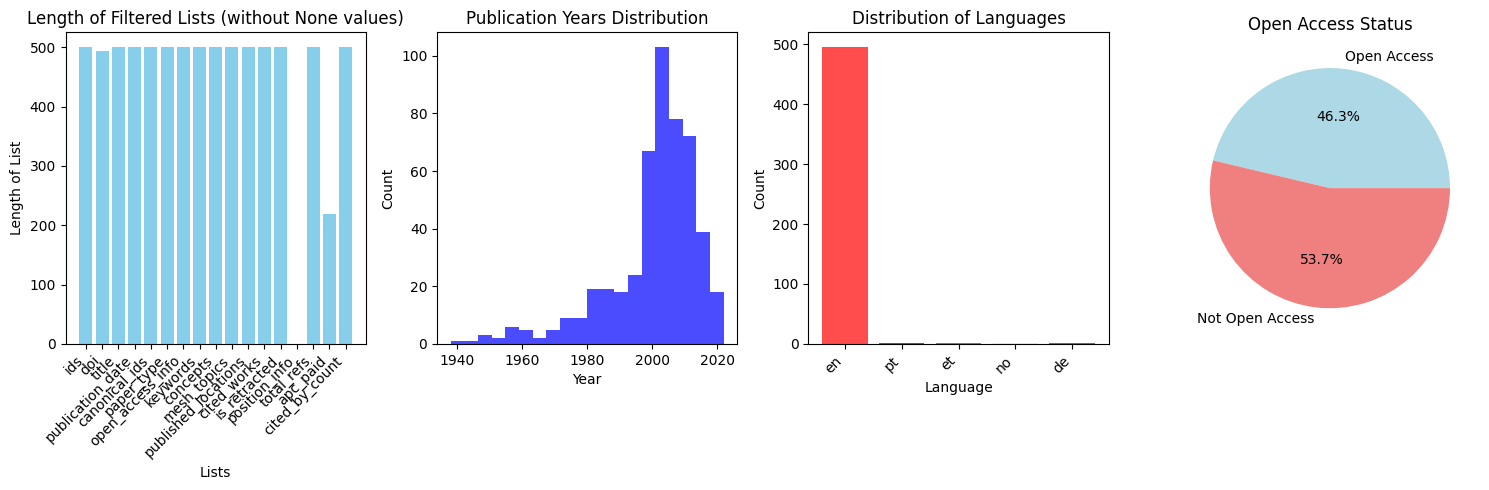

In [130]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_combined_analysis(all_extended_lists, pub_years, languages, is_oa):
    # Plot for filtered lists
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    filtered_lists = [[item for item in lst if item is not None] for lst in all_extended_lists]
    list_lengths = [len(lst) for lst in filtered_lists]
    plt.bar(range(len(filtered_lists)), list_lengths, color='skyblue')
    plt.xlabel('Lists')
    plt.ylabel('Length of List')
    plt.xticks(range(len(filtered_lists)), ['ids', 'doi', 'title', 'publication_date', 'canonical_ids', 'paper_type', 
                              'open_access_info', 'keywords', 'concepts', 'mesh_topics', 
                              'published_locations', 'cited_works', 'is_retracted', 
                              'position_info', 'total_refs', 'apc_paid', 'cited_by_count'], rotation=45, ha='right')
    plt.title('Length of Filtered Lists (without None values)')

    # Plot for publication years
    plt.subplot(1, 4, 2)
    plt.hist(pub_years, bins=20, color='blue', alpha=0.7)
    plt.title('Publication Years Distribution')
    plt.xlabel('Year')
    plt.ylabel('Count')

    # Plot for languages as a bar chart
    plt.subplot(1, 4, 3)
    language_counts = Counter(languages)
    labels, counts = zip(*language_counts.items())
    plt.bar(labels, counts, color=['red', 'blue', 'green', 'yellow', 'purple', 'orange'], alpha=0.7)
    plt.title('Distribution of Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Pie Chart for Open Access Status
    plt.subplot(1, 4, 4)
    plt.pie([is_oa.count(True), is_oa.count(False)], labels=['Open Access', 'Not Open Access'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Open Access Status')

    plt.tight_layout()
    plt.show()

all_extended_lists = [ids, doi, title, publication_date, canonical_ids, paper_type, 
                      open_access_info, keywords, concepts, mesh_topics, 
                      published_locations, cited_works, is_retracted, 
                      position_info, total_refs, apc_paid, cited_by_count]


plot_combined_analysis(all_extended_lists, pub_years, languages, is_oa)


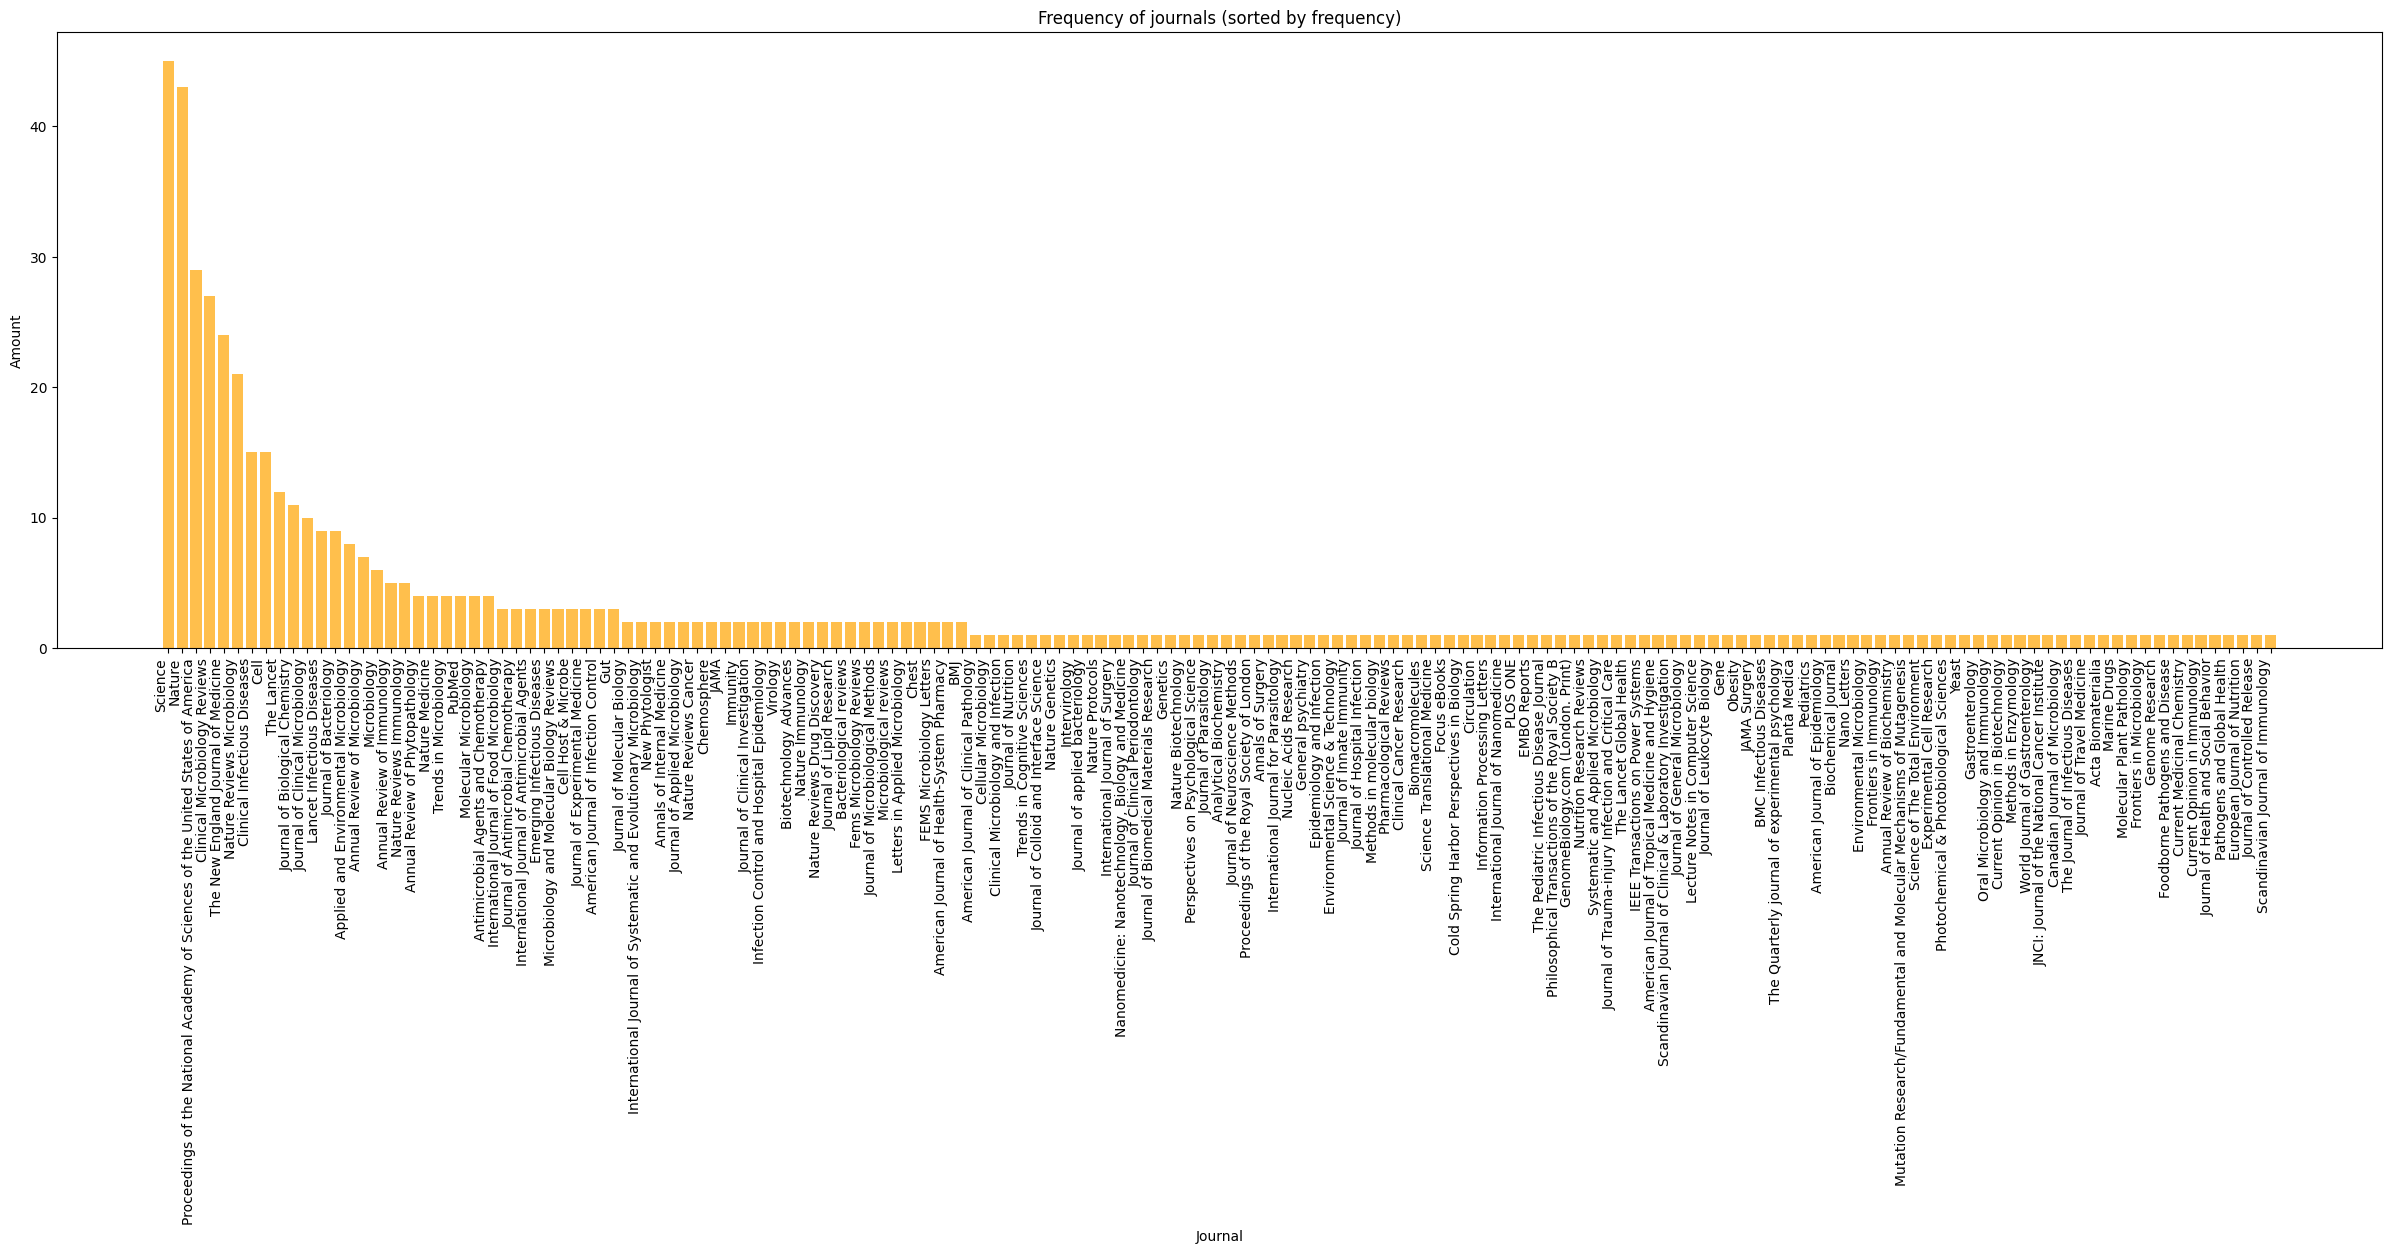

In [132]:
# Filter out None values from the journals list
filtered_journals = [journal for journal in journals if journal is not None]

journal_counts = Counter(filtered_journals)

sorted_counts = dict(sorted(journal_counts.items(), key=lambda item: item[1], reverse=True))
labels, counts = zip(*sorted_counts.items())

# Plot for the Journale as Bar Chart
plt.figure(figsize=(30, 8))
plt.bar(labels, counts, color='orange', alpha=0.7)
plt.title('Frequency of journals (sorted by frequency)')
plt.xlabel('Journal')
plt.ylabel('Amount')
plt.xticks(rotation=90, ha='right')
plt.show()
